# Restaurants & Cafes Location Analysis in Singapore

## Table of Content

### Week 1
### Part 1: Background and Description of the Problem
- 1.A Background    
- 1.B Description of the Problem

### Part 2: Data Description and How it Will Solve the Problem
- 2.A Data Description
- 2.B How it Will Solve the Problem

### Week 2
### Part 3: Codes for Data Extraction and Analysis
- 3.A Extract Singapore Neighborhood Data
- 3.B Get Coordinates from Wikipedia and Geocoder
- 3.C Use Foursquare API to Get Business Venues
- 3.D Cluster Singapore Neighborhood for General Analysis
- 3.E Detailed Study for One Particular Business

# Main Content: Week 1

## Part 1: Background and Description of the Problem

### 1.A Background

Singapore is a well developed city-state located in South East Asia. Well known as the main financial and logistic hub of the region, various businesses continue to develop here. This opportunity attracts various culinary businesess like food courts, restaurants, dessert stalls, and cafes to set up their shops here. However, the growing number and diversity of culinary businesses in Singapore is so overwhelming, so that a new culinary entrepreneur will need to perform serious initial feasibility study to carefully plan their growing business. Every new culinary entrepreneur will need to analyze potential customers to make sure that their business can grow. Apart from that, they also need to consider potential competitive businesses that may drive them out of the culinary business competition.

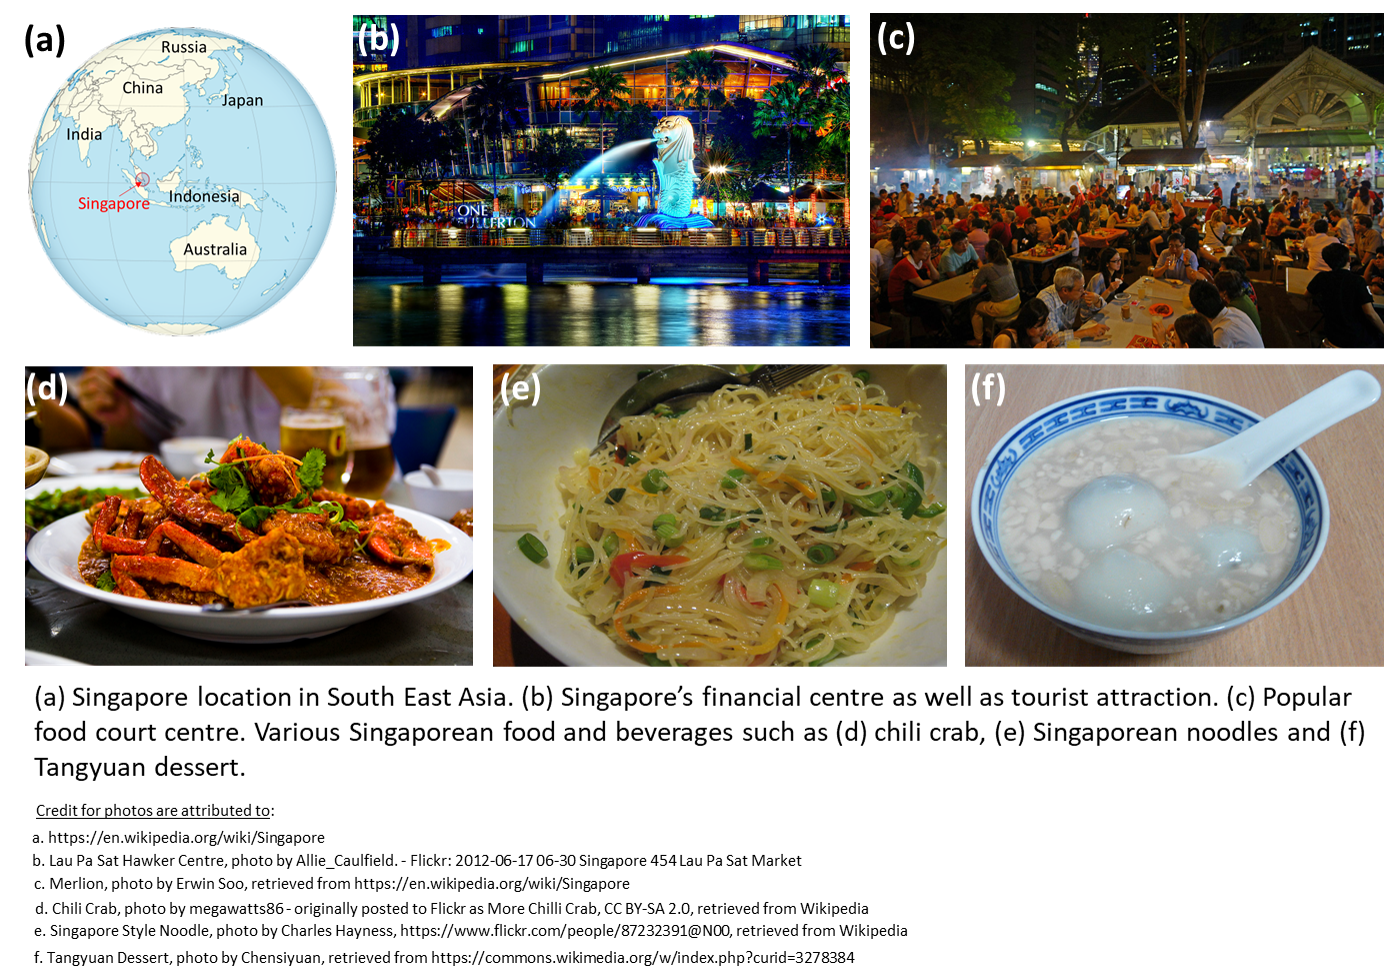

In [1236]:
from IPython.display import Image
Image("Singapore introduction.png")

### 1.B Description of the Problem

In summary, the target audience is:     
- **culinary entrepreneurs (food courts, restaurants, fast food joint, cafes etc)**, who want to open a new business.

Problems to investigate:
- **Where to open their new business?**
- **How many is their potential customers?**
- **What kind of competitors they may face?**

Why would our target audience care:     
- **They need to decide a place to start their business.**    
- **Without selecting the correct place, they may fail to get customers.**   
- **Without customers nobody buys their products.**   
- **Also, they need to differentiate themselves from competitors.**   

## Part 2: Data Description and How it Will Solve the Problem

### 2.A Data Description

There are several main dataset we will collect:
- **Zones and Coordinates Info for Each Location in Singapore**
- **Population Counts for Each Zones**
- **Venues Category and Counts for Each Zones**

### 2.B How it Will Solve the Problem

Zones and Coordinate Info for Each Location in Singapore can be used to identify location of various neighborhood in this city. Subsequently, we want to collect population counts for each zones. Regions, with high population counts may provide our target audience (culinary entrepreneur) who want to leverage large number of customers. Subsequently, we want to collect data about various venues culinary or non-culinary using Foursquare API.

If it is non-culinary, it is of interest to our target audience since it is possible to pair our culinary product with those venues. For example healthy food stall may be a good pair around sport stadium and cafe may be a good pair with library. 

If it is culinary, it is also important to decide whether they are in the same category or not. If we want to open a ramen shop, we must check not only the presence of other ramen shop, but also udon, noodles, pasta etc. On the other hand, it may be okay if the other venues are selling different kinds of food. Using data that we can obtain using Foursquare API, we can help to provide a dataset that can help our customer to investigate and decide where to open up their venue.

# Main Content: Week 2

## Part 3: Codes for Data Extraction and Analysis

"Planning Areas, also known as DGP areas or DGP zones, are the main urban planning and census divisions of Singapore delineated by the Urban Redevelopment Authority. There are a total of 55 of these areas, organised into five regions. A Development Guide Plan is then drawn up for each planning area, providing for detailed planning guidelines for every individual plot of land throughout the country."
Reference from: https://eresources.nlb.gov.sg/infopedia/articles/SIP_1371_2009-01-05.html

DGP = Development guide plans (DGPs)

Unlike the postal sectors division, a clear map that delineate the divisions between DGP zones is more readily understood, as can be inspected here:
'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
linkB = 'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

webpageB = requests.get(linkB)

soupB = BeautifulSoup(webpageB.content,'lxml')

In [3]:
#print(soupB.prettify)

In [4]:
soupB_wikitable = soupB.find(attrs={"class": "wikitable sortable"})
soupB_wikitable

<table class="wikitable sortable">
<tbody><tr>
<th>Name <small>(<a href="/wiki/English_language" title="English language">English</a>)</small>
</th>
<th><a href="/wiki/Malay_language" title="Malay language">Malay</a>
</th>
<th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
</th>
<th><a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>
</th>
<th><a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>
</th>
<th>Region
</th>
<th>Area (km2)
</th>
<th>Population<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Density (/km2)
</th></tr>
<tr>
<td><a href="/wiki/Ang_Mo_Kio" title="Ang Mo Kio">Ang Mo Kio</a>
</td>
<td>
</td>
<td>宏茂桥
</td>
<td>Hóng mào qiáo
</td>
<td>ஆங் மோ கியோ
</td>
<td><a href="/wiki/North-East_Region,_Singapore" title="North-East Region, Singapore">North-East</a>
</td>
<td>13.94
</td>
<td>165,710
</td>
<td>12,000
</td></tr>
<tr>
<td><a href="/wiki/Bedok" title="Bedok">Bedok</a>
</td>
<td>*
</td>
<td>勿洛
</td>
<td>

In [5]:
tableB_entry_list = soupB_wikitable.findAll('a')
#tableB_entry_list

In [6]:
numberB_rows = len(tableB_entry_list)
numberB_rows

116

In [7]:
# Collect zones name and zones link from the soupB object.
zones_list = []
zones_links_list = []
for index in range(6, numberB_rows, 1):
    if index % 2 == 0:
        zone = tableB_entry_list[index].get_text()
        zones_list.append(zone)
        urlx = str(tableB_entry_list[index])
        urlx = urlx.split('title')
        urlx = urlx[0]
        urlx = urlx.split('"')
        urlx = urlx[1]
        #zone_area_i =  
        zones_links_list.append(urlx)

In [215]:
tableC_entry_list_area_population = soupB_wikitable.findAll('td')
tableC_entry_list_area_population
numberC_rows = len(tableC_entry_list_area_population)
numberC_rows

495

In [282]:
zones_area_list = []
zones_population_list = []
for index in range(0, numberC_rows, 1):
    #print(index)
    #print(tableC_entry_list_area_population[index])
    if (index-6)%9 == 0:
        areas = tableC_entry_list_area_population[index]
        areas = str(areas.get_text())
        areas = areas.strip('\n')
        areas = float(areas)
        zones_area_list.append(areas)
        #print('areas= ', areas)
    if (index-6)%9 == 1:
        population = tableC_entry_list_area_population[index]
        population = str(population.get_text())
        population = population.strip('\n')
        if population == '*':
            population = int(0)
        else:
            try:
                population = population.split(',')
                population = population[0] + population[1]
            except:
                pass
        if type(population) == list:
            population = population[0]
        population = int(population)
        #print(population)
        #print(type(population))
        zones_population_list.append(population)

In [8]:
# example of zones name
print(zones_list[0:10])

['Ang Mo Kio', 'Bedok', 'Bishan', 'Boon Lay', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Bukit Timah', 'Central Water Catchment', 'Changi']


In [9]:
# example of zones wikipedia link
print(zones_links_list[0:10])

['/wiki/Ang_Mo_Kio', '/wiki/Bedok', '/wiki/Bishan,_Singapore', '/wiki/Boon_Lay_Planning_Area', '/wiki/Bukit_Batok', '/wiki/Bukit_Merah', '/wiki/Bukit_Panjang', '/wiki/Bukit_Timah', '/wiki/Central_Water_Catchment', '/wiki/Changi']


In [283]:
# example of zones area
zones_area_list[0:10]

[13.94, 21.69, 7.62, 8.23, 11.13, 14.34, 8.99, 17.53, 37.15, 40.61]

In [284]:
# example of population number:
print(zones_population_list[0:10])

[165710, 281300, 88490, 30, 144410, 151870, 140820, 77280, 0, 2080]


In [10]:
# Collect latitude and longitude from wikipedia, if it is available.
# If not available, put 'NaN'.

latitude_list = []
longitude_list = []
postal_district_list = []
for index in range(0, len(zones_links_list), 1):
    link_wikipedia = 'https://en.wikipedia.org'
    link_zone = zones_links_list[index]
    link_wiki_zone = link_wikipedia + link_zone
    print(link_wiki_zone)
    try:
        webpage = requests.get(link_wiki_zone)
        soup_zone = BeautifulSoup(webpage.content,'lxml')
        lat = soup_zone.find(attrs={"class": "latitude"}).get_text()
        lon = soup_zone.find(attrs={"class": "longitude"}).get_text()
        postal_district = soup_zone.find(attrs={"class": "postal-code"}).get_text()
    except:
        lat = 'NaN'
        lon = 'NaN'
        postal_district = 'NaN'
    print(lat)
    print(lon)
    print(postal_district)
    latitude_list.append(lat)
    longitude_list.append(lon)
    postal_district_list.append(postal_district)

https://en.wikipedia.org/wiki/Ang_Mo_Kio
1°22′12.6″N
103°50′44.23″E
20
https://en.wikipedia.org/wiki/Bedok
1°19′24.96″N
103°55′38.42″E
16
https://en.wikipedia.org/wiki/Bishan,_Singapore
1°21′3″N
103°51′5″E
20
https://en.wikipedia.org/wiki/Boon_Lay_Planning_Area
NaN
NaN
NaN
https://en.wikipedia.org/wiki/Bukit_Batok
1°21′32.51″N
103°45′49.25″E
21, 23
https://en.wikipedia.org/wiki/Bukit_Merah
1°16′54.86″N
103°49′26.11″E
2, 3, 4, 5, 9, 10
https://en.wikipedia.org/wiki/Bukit_Panjang
1°22′51.00″N
103°45′45.00″E
21, 23
https://en.wikipedia.org/wiki/Bukit_Timah
1°19′45.88″N
103°48′7.48″E
10, 11, 21
https://en.wikipedia.org/wiki/Central_Water_Catchment
01°22′N
103°48′E
25
https://en.wikipedia.org/wiki/Changi
1°20′42″N
103°58′59.5″E
17
https://en.wikipedia.org/wiki/Changi_Bay
NaN
NaN
NaN
https://en.wikipedia.org/wiki/Choa_Chu_Kang
1°23′N
103°45′E
23
https://en.wikipedia.org/wiki/Clementi,_Singapore
1°18′58.25″N
103°45′53.78″E
5, 21
https://en.wikipedia.org/wiki/Downtown_Core
1°17′12″N
103°51′13″

In [11]:
# Create dataframe from the coordinates we collected
dictXY = {'DGP zones':zones_list, 'zone_links':zones_links_list, 'latitude': latitude_list, 'longitude':longitude_list, 
         'postal districts':postal_district_list}
df_zone_SG = pd.DataFrame.from_dict(dictXY)
df_zone_SG.head()

,DGP zones,zone_links,latitude,longitude,postal districts
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1°22′12.6″N,103°50′44.23″E,20
1,Bedok,/wiki/Bedok,1°19′24.96″N,103°55′38.42″E,16
2,Bishan,"/wiki/Bishan,_Singapore",1°21′3″N,103°51′5″E,20
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN
4,Bukit Batok,/wiki/Bukit_Batok,1°21′32.51″N,103°45′49.25″E,"21, 23"


In [12]:
# Create and test functions to convert coordinate values in degree, minute, second (DMS) format to decimal format

def latitude_DMS_to_decimal(latx):
    if latx == 'NaN':
        return 'NaN'
    # get north or south
    sign_lat_DMS = latx[-1]
    if sign_lat_DMS == 'N':
        sign_lat_decimal = 1
    elif sign_lat_DMS == 'S':
        sign_lat_decimal = -1
    # get degree
    lat_degree = latx.split('°')
    lat_degree = lat_degree[0]
    # get minute
    lat_minute = latx.split('°')
    lat_minute = lat_minute[1]
    lat_minute = lat_minute.split("′")
    lat_minute = lat_minute[0]
    # get_second
    lat_second = latx.split('′')
    lat_second = lat_second[1]
    lat_second = lat_second.split('″')
    lat_second = lat_second[0]
    # if second not defined
    if lat_second == latx[-1]:
        lat_second = '0'
    # get magnitude of latitude
    #print(latx)
    #print(lat_degree)
    #print(lat_minute)
    #print(lat_second)
    mag_lat_decimal = float(lat_degree) + float(lat_minute)/60 + float(lat_second)/3600
    # get latitude in decimal
    lat_decimal = sign_lat_decimal*mag_lat_decimal
    return lat_decimal

# result = latitude_DMS_to_decimal('112°22′12.6″S')  
# print(result)
# result = latitude_DMS_to_decimal('NaN')  
# print(result)


def longitude_DMS_to_decimal(lonx):
    if lonx == 'NaN':
        return 'NaN'
    # get north or south
    sign_lon_DMS = lonx[-1]
    if sign_lon_DMS == 'E':
        sign_lon_decimal = 1
    elif sign_lon_DMS == 'W':
        sign_lon_decimal = -1
    # get degree
    lon_degree = lonx.split('°')
    lon_degree = lon_degree[0]
    # get minute
    lon_minute = lonx.split('°')
    lon_minute = lon_minute[1]
    lon_minute = lon_minute.split("′")
    lon_minute = lon_minute[0]
    # get_second
    lon_second = lonx.split('′')
    lon_second = lon_second[1]
    lon_second = lon_second.split('″')
    lon_second = lon_second[0]
    # if second not defined
    if lon_second == lonx[-1]:
        lon_second = '0'
    # get magnitude of longitude
    mag_lon_decimal = float(lon_degree) + float(lon_minute)/60 + float(lon_second)/3600
    # get longitude in decimal
    lon_decimal = sign_lon_decimal*mag_lon_decimal
    return lon_decimal

# result = longitude_DMS_to_decimal('103°50′44.23″W')  
# print(result)
# result = longitude_DMS_to_decimal('NaN')  
# print(result)

In [13]:
df_zone_SG['latitude']= df_zone_SG['latitude'].apply(latitude_DMS_to_decimal)
df_zone_SG['latitude'][0:5]

0    1.37017
1     1.3236
2    1.35083
3        NaN
4    1.35903
Name: latitude, dtype: object

In [14]:
df_zone_SG['longitude']= df_zone_SG['longitude'].apply(longitude_DMS_to_decimal)
df_zone_SG['longitude'][0:5]

0    103.846
1    103.927
2    103.851
3        NaN
4    103.764
Name: longitude, dtype: object

In [15]:
df_zone_SG.head(10)

,DGP zones,zone_links,latitude,longitude,postal districts
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.37017,103.846,20
1,Bedok,/wiki/Bedok,1.3236,103.927,16
2,Bishan,"/wiki/Bishan,_Singapore",1.35083,103.851,20
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN
4,Bukit Batok,/wiki/Bukit_Batok,1.35903,103.764,"21, 23"
5,Bukit Merah,/wiki/Bukit_Merah,1.28191,103.824,"2, 3, 4, 5, 9, 10"
6,Bukit Panjang,/wiki/Bukit_Panjang,1.38083,103.763,"21, 23"
7,Bukit Timah,/wiki/Bukit_Timah,1.32941,103.802,"10, 11, 21"
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.36667,103.8,25
9,Changi,/wiki/Changi,1.345,103.983,17


In [16]:
df_temp = df_zone_SG[df_zone_SG['latitude'] == 'NaN']
df_temp.head() 

,DGP zones,zone_links,latitude,longitude,postal districts
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN
10,Changi Bay,/wiki/Changi_Bay,NaN,NaN,NaN
21,Marina East,/wiki/Marina_East,NaN,NaN,NaN
22,Marina South,/wiki/Marina_South,NaN,NaN,NaN
26,North-Eastern Islands,/wiki/North-Eastern_Islands,NaN,NaN,NaN


In [17]:
list_zones_missing_coordinates = df_temp['DGP zones'].tolist()
list_zones_missing_coordinates

['Boon Lay',
 'Changi Bay',
 'Marina East',
 'Marina South',
 'North-Eastern Islands',
 'Orchard',
 'Paya Lebar',
 'Pioneer',
 'River Valley',
 'Sembawang',
 'Simpang',
 'Singapore River',
 'Southern Islands',
 'Straits View',
 'Tanglin',
 'Tengah',
 'Western Islands']

In [18]:
from geopy.geocoders import Nominatim
import time   #pause script for a while

latitude_na_list = []
longitude_na_list = []
zone_lat_na_dictionary = {}
zone_lon_na_dictionary = {}
for index in range(len(list_zones_missing_coordinates)):
    time.sleep(3)
    address = list_zones_missing_coordinates[index] + ', Singapore'
    try:
        geolocator = Nominatim(user_agent="sg_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NaN'
        longitude = 'NaN'
    zone_lat_na_dictionary[list_zones_missing_coordinates[index]] = latitude
    zone_lon_na_dictionary[list_zones_missing_coordinates[index]] = longitude
    print(list_zones_missing_coordinates[index], latitude, longitude)

Boon Lay 1.3385752 103.7058478
Changi Bay 1.3168496 104.0206494
Marina East 1.288624 103.869827
Marina South 1.276998 103.8615002
North-Eastern Islands NaN NaN
Orchard 1.305272 103.8328757
Paya Lebar 1.3538993000000001 103.88782052662438
Pioneer 1.3375884 103.6974104
River Valley 1.3083982 103.8861489
Sembawang 1.4490928 103.8200555
Simpang 1.4452954 103.8497425
Singapore River 1.28917835 103.84515431766008
Southern Islands NaN NaN
Straits View 1.2792579 103.8531856
Tanglin 1.3060443 103.8152804
Tengah 1.3669017 103.7108456
Western Islands NaN NaN


In [19]:
df_temp.head()

,DGP zones,zone_links,latitude,longitude,postal districts
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN
10,Changi Bay,/wiki/Changi_Bay,NaN,NaN,NaN
21,Marina East,/wiki/Marina_East,NaN,NaN,NaN
22,Marina South,/wiki/Marina_South,NaN,NaN,NaN
26,North-Eastern Islands,/wiki/North-Eastern_Islands,NaN,NaN,NaN


In [20]:
df_temp['latitude_format'] = df_temp['DGP zones']
df_temp['latitude_format'] = df_temp['latitude_format'].map(zone_lat_na_dictionary)
df_temp['longitude_format'] = df_temp['DGP zones']
df_temp['longitude_format'] = df_temp['longitude_format'].map(zone_lon_na_dictionary)
df_temp

C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,DGP zones,zone_links,latitude,longitude,postal districts,latitude_format,longitude_format
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN,1.33858,103.706
10,Changi Bay,/wiki/Changi_Bay,NaN,NaN,NaN,1.31685,104.021
21,Marina East,/wiki/Marina_East,NaN,NaN,NaN,1.28862,103.87
22,Marina South,/wiki/Marina_South,NaN,NaN,NaN,1.277,103.862
26,North-Eastern Islands,/wiki/North-Eastern_Islands,NaN,NaN,NaN,NaN,NaN
28,Orchard,mw-redirect,NaN,NaN,NaN,1.30527,103.833
31,Paya Lebar,/wiki/Paya_Lebar,NaN,NaN,NaN,1.3539,103.888
32,Pioneer,"/wiki/Pioneer,_Singapore",NaN,NaN,NaN,1.33759,103.697
35,River Valley,"/wiki/River_Valley,_Singapore",NaN,NaN,NaN,1.3084,103.886
38,Sembawang,/wiki/Sembawang,NaN,NaN,NaN,1.44909,103.82


In [21]:
df_temp['latitude'] = df_temp['latitude_format']
df_temp['longitude'] = df_temp['longitude_format']

C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_temp = df_temp.drop(['latitude_format', 'longitude_format'], axis = 1)
df_temp

,DGP zones,zone_links,latitude,longitude,postal districts
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.33858,103.706,NaN
10,Changi Bay,/wiki/Changi_Bay,1.31685,104.021,NaN
21,Marina East,/wiki/Marina_East,1.28862,103.87,NaN
22,Marina South,/wiki/Marina_South,1.277,103.862,NaN
26,North-Eastern Islands,/wiki/North-Eastern_Islands,NaN,NaN,NaN
28,Orchard,mw-redirect,1.30527,103.833,NaN
31,Paya Lebar,/wiki/Paya_Lebar,1.3539,103.888,NaN
32,Pioneer,"/wiki/Pioneer,_Singapore",1.33759,103.697,NaN
35,River Valley,"/wiki/River_Valley,_Singapore",1.3084,103.886,NaN
38,Sembawang,/wiki/Sembawang,1.44909,103.82,NaN


In [23]:
df_zone_SG['latitude_format'] = df_zone_SG['DGP zones']
df_zone_SG['latitude_format'] = df_zone_SG['latitude_format'].map(zone_lat_na_dictionary)
df_zone_SG['longitude_format'] = df_zone_SG['DGP zones']
df_zone_SG['longitude_format'] = df_zone_SG['longitude_format'].map(zone_lon_na_dictionary)
df_zone_SG.head(10)

,DGP zones,zone_links,latitude,longitude,postal districts,latitude_format,longitude_format
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.37017,103.846,20,NaN,NaN
1,Bedok,/wiki/Bedok,1.3236,103.927,16,NaN,NaN
2,Bishan,"/wiki/Bishan,_Singapore",1.35083,103.851,20,NaN,NaN
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,NaN,NaN,NaN,1.33858,103.706
4,Bukit Batok,/wiki/Bukit_Batok,1.35903,103.764,"21, 23",NaN,NaN
5,Bukit Merah,/wiki/Bukit_Merah,1.28191,103.824,"2, 3, 4, 5, 9, 10",NaN,NaN
6,Bukit Panjang,/wiki/Bukit_Panjang,1.38083,103.763,"21, 23",NaN,NaN
7,Bukit Timah,/wiki/Bukit_Timah,1.32941,103.802,"10, 11, 21",NaN,NaN
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.36667,103.8,25,NaN,NaN
9,Changi,/wiki/Changi,1.345,103.983,17,NaN,NaN


In [71]:
df_zone_SG[df_zone_SG['latitude'] == 'NaN'].head()

,DGP zones,zone_links,latitude,longitude,postal districts


In [25]:
index_missing_zones_temp = df_zone_SG[df_zone_SG['latitude'] == 'NaN'].index.to_list()
index_missing_zones_temp

[3, 10, 21, 22, 26, 28, 31, 32, 35, 38, 41, 42, 43, 44, 47, 48, 51]

In [26]:
df_zone_SG =  df_zone_SG.drop(index_missing_zones_temp)
df_zone_SG.head(10)

,DGP zones,zone_links,latitude,longitude,postal districts,latitude_format,longitude_format
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.37017,103.846,20,NaN,NaN
1,Bedok,/wiki/Bedok,1.3236,103.927,16,NaN,NaN
2,Bishan,"/wiki/Bishan,_Singapore",1.35083,103.851,20,NaN,NaN
4,Bukit Batok,/wiki/Bukit_Batok,1.35903,103.764,"21, 23",NaN,NaN
5,Bukit Merah,/wiki/Bukit_Merah,1.28191,103.824,"2, 3, 4, 5, 9, 10",NaN,NaN
6,Bukit Panjang,/wiki/Bukit_Panjang,1.38083,103.763,"21, 23",NaN,NaN
7,Bukit Timah,/wiki/Bukit_Timah,1.32941,103.802,"10, 11, 21",NaN,NaN
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.36667,103.8,25,NaN,NaN
9,Changi,/wiki/Changi,1.345,103.983,17,NaN,NaN
11,Choa Chu Kang,/wiki/Choa_Chu_Kang,1.38333,103.75,23,NaN,NaN


In [27]:
df_zone_SG = df_zone_SG.drop(['latitude_format', 'longitude_format'],axis = 1)
df_zone_SG.head(10)

,DGP zones,zone_links,latitude,longitude,postal districts
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.37017,103.846,20
1,Bedok,/wiki/Bedok,1.3236,103.927,16
2,Bishan,"/wiki/Bishan,_Singapore",1.35083,103.851,20
4,Bukit Batok,/wiki/Bukit_Batok,1.35903,103.764,"21, 23"
5,Bukit Merah,/wiki/Bukit_Merah,1.28191,103.824,"2, 3, 4, 5, 9, 10"
6,Bukit Panjang,/wiki/Bukit_Panjang,1.38083,103.763,"21, 23"
7,Bukit Timah,/wiki/Bukit_Timah,1.32941,103.802,"10, 11, 21"
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.36667,103.8,25
9,Changi,/wiki/Changi,1.345,103.983,17
11,Choa Chu Kang,/wiki/Choa_Chu_Kang,1.38333,103.75,23


In [28]:
df_zone_SG_final = pd.concat([df_zone_SG, df_temp])
df_zone_SG_final = df_zone_SG_final.sort_values('DGP zones')
df_zone_SG_final.head(10)

,DGP zones,zone_links,latitude,longitude,postal districts
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.37017,103.846,20
1,Bedok,/wiki/Bedok,1.3236,103.927,16
2,Bishan,"/wiki/Bishan,_Singapore",1.35083,103.851,20
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.33858,103.706,NaN
4,Bukit Batok,/wiki/Bukit_Batok,1.35903,103.764,"21, 23"
5,Bukit Merah,/wiki/Bukit_Merah,1.28191,103.824,"2, 3, 4, 5, 9, 10"
6,Bukit Panjang,/wiki/Bukit_Panjang,1.38083,103.763,"21, 23"
7,Bukit Timah,/wiki/Bukit_Timah,1.32941,103.802,"10, 11, 21"
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.36667,103.8,25
9,Changi,/wiki/Changi,1.345,103.983,17


In [29]:
# Check for the remaining missing values:
df_zone_SG_final[df_zone_SG_final['latitude'] == 'NaN']

,DGP zones,zone_links,latitude,longitude,postal districts
26,North-Eastern Islands,/wiki/North-Eastern_Islands,NaN,NaN,NaN
43,Southern Islands,/wiki/Southern_Islands,NaN,NaN,NaN
51,Western Islands,"/wiki/Western_Islands,_Singapore",NaN,NaN,NaN


In [30]:
# Since it is only a few values, we locate it manually, then fill it to the dataframe
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='North-Eastern Islands', 'latitude'] = 1.4043812
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='North-Eastern Islands', 'longitude'] = 103.983914
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina South', 'latitude'] = 1.2692
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina South', 'longitude'] = 103.8579
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Southern Islands', 'latitude'] = 1.2470271
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Southern Islands', 'longitude'] = 103.8296886
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tanglin', 'latitude'] = 1.3075844
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tanglin', 'longitude'] = 103.8013147


# reposition some markers
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tengah', 'latitude'] = 1.3624759
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tengah', 'longitude'] = 103.7099298
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Lim Chu Kang', 'latitude'] = 1.431844
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Lim Chu Kang', 'longitude'] = 103.719295
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Boon Lay', 'latitude'] = 1.3477353
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Boon Lay', 'longitude'] = 103.7088263

In [285]:
# Check for the remaining missing values:
df_zone_SG_final[df_zone_SG_final['latitude'] == 'NaN']

C:\Users\aribimop\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,DGP zones,zone_links,latitude,longitude,postal districts


In [32]:
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina East', 'latitude'] = 1.2911576
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina East', 'longitude'] = 103.8720195
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Straits View', 'latitude'] = 1.2785521
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Straits View', 'longitude'] = 103.8505526
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Western Islands', 'latitude'] = 1.2483605
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Western Islands', 'longitude'] = 103.6720186

In [287]:
df_zone_SG_final.head()

,DGP zones,zone_links,latitude,longitude,postal districts,areas,population
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410


## Put the areas and population information.

In [286]:
df_zone_SG_final['areas'] = pd.Series(zones_area_list)
df_zone_SG_final['population'] = pd.Series(zones_population_list)
df_zone_SG_final

,DGP zones,zone_links,latitude,longitude,postal districts,areas,population
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410
5,Bukit Merah,/wiki/Bukit_Merah,1.281906,103.823919,"2, 3, 4, 5, 9, 10",14.34,151870
6,Bukit Panjang,/wiki/Bukit_Panjang,1.380833,103.762500,"21, 23",8.99,140820
7,Bukit Timah,/wiki/Bukit_Timah,1.329411,103.802078,"10, 11, 21",17.53,77280
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.366667,103.800000,25,37.15,0
9,Changi,/wiki/Changi,1.345000,103.983194,17,40.61,2080


# Save the dataframe to a csv file.

In [290]:
#df_zone_SG_final.to_csv('sg_zones_coordinates_v3.csv', index=False)

# Reload the dataframe from a csv file.

In [457]:
df_zone_SG_final = pd.read_csv('sg_zones_coordinates_v3.csv', index_col=False)

# Get Folium map.

In [458]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [459]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

In [460]:
# add markers to map
for lat, lng, zone in zip(df_zone_SG_final['latitude'], df_zone_SG_final['longitude'], df_zone_SG_final['DGP zones']):
    #print(zone)
    label = '{}'.format(zone)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

# Cluster based on venues of interest
## Explore first neighborhood

In [461]:
CLIENT_ID = 'PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID' # your Foursquare ID
CLIENT_SECRET = 'I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID
CLIENT_SECRET:I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX


In [462]:
df_zone_SG_final.head()

,DGP zones,zone_links,latitude,longitude,postal districts,areas,population
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410


In [463]:
df_zone_SG_final.loc[0, 'DGP zones']

'Ang Mo Kio'

In [464]:
lat = df_zone_SG_final.loc[0, 'latitude']
lon = df_zone_SG_final.loc[0, 'longitude']

In [465]:
# Get 200 nearest venues
LIMIT = 200  #limit number of venues
radius = 3000  #define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lon, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID&client_secret=I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX&v=20180605&ll=1.3701666666666668,103.84561944444445&radius=3000&limit=200'

In [466]:
# import requests # library to handle requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2fc2451835dd001b4d6046'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore',
  'headerFullLocation': 'Singapore',
  'headerLocationGranularity': 'city',
  'totalResults': 150,
  'suggestedBounds': {'ne': {'lat': 1.3971666936666938,
    'lng': 103.8725767670541},
   'sw': {'lat': 1.3431666396666397, 'lng': 103.8186621218348}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9f4875f964a520e21a37e3',
       'name': 'Bishan - Ang Mo Kio Park',
       'location': {'address': 'Ang Mo Kio Ave 1',
        'lat': 1.3622192498801895,
        'lng': 103.8462495803833,
        'labeledLatLngs': [{'label': 'display',
          'lat': 1.362219249

In [467]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [468]:
venues = results['response']['groups'][0]['items']

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bishan - Ang Mo Kio Park,Park,1.362219,103.846250
1,Aramsa ~ The Garden Spa,Spa,1.362292,103.847602
2,FairPrice Xtra,Supermarket,1.369279,103.848886
3,龍海鮮螃蟹王 Mellben Seafood,Seafood Restaurant,1.368324,103.836764
4,Face Ban Mian 非板面 (Ang Mo Kio),Noodle House,1.372031,103.847504


In [469]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


# Explore all neighborhoods

In [470]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Get data of venues in Singapore

In [471]:
df_final = df_zone_SG_final.copy()
print(df_final.shape)
df_final.head()

(55, 7)


,DGP zones,zone_links,latitude,longitude,postal districts,areas,population
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410


In [472]:
df_final = df_final.rename(columns={'DGP zones':'Neighborhood', 'latitude':'Latitude', 'longitude':'Longitude'})
# drop outlier places
#df_final = df_final.drop([17],axis=0)
#df_final = df_final.drop([10],axis=0)
print(df_final.shape)
df_final.head()

(55, 7)


,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410


In [473]:
singapore_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [474]:
singapore_venues_data_backup = singapore_venues.copy()

In [475]:
singapore_venues = singapore_venues_data_backup

In [476]:
print(singapore_venues.shape)
singapore_venues.head()

(1622, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.370167,103.845619,NTUC FairPrice,1.371507,103.847082,Supermarket
1,Ang Mo Kio,1.370167,103.845619,Subway,1.369136,103.847612,Sandwich Place
2,Ang Mo Kio,1.370167,103.845619,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
3,Ang Mo Kio,1.370167,103.845619,MOS Burger,1.369170,103.847831,Burger Joint
4,Ang Mo Kio,1.370167,103.845619,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant


## Check the number of venues for each neighborhood

In [478]:
singapore_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ang Mo Kio,56,56,56,56,56,56
Bedok,64,64,64,64,64,64
Bishan,42,42,42,42,42,42
Boon Lay,8,8,8,8,8,8
Bukit Batok,33,33,33,33,33,33


In [479]:
singapore_venues.groupby('Neighborhood').count().tail()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Tuas,7,7,7,7,7,7
Western Islands,1,1,1,1,1,1
Western Water Catchment,1,1,1,1,1,1
Woodlands,53,53,53,53,53,53
Yishun,46,46,46,46,46,46


In [480]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 242 uniques categories.


In [488]:
df_temp = singapore_venues.groupby('Neighborhood').count()
zones_venues_count = df_temp['Venue'].tolist()
zones_venues_count[0:5]

[56, 64, 42, 8, 33]

In [489]:
zones_venues_count[-5:]

[7, 1, 1, 53, 46]

In [490]:
for index in range(len(zones_venues_count)):
    zones_venues_count[index] = int(zones_venues_count[index])

In [491]:
df_final.shape

(55, 7)

In [492]:
df_final['venues_count'] = pd.Series(zones_venues_count)

In [493]:
print(df_final.shape)
df_final.head()

(55, 8)


,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710,56
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300,64
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490,42
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30,8
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410,33


In [494]:
df_final.tail()

,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count
50,Tuas,/wiki/Tuas,1.316667,103.650000,22,30.04,70,7
51,Western Islands,"/wiki/Western_Islands,_Singapore",1.248360,103.672019,NaN,39.47,10,1
52,Western Water Catchment,/wiki/Western_Water_Catchment,1.386944,103.691944,24,69.46,720,1
53,Woodlands,"/wiki/Woodlands,_Singapore",1.436269,103.786706,25,13.59,252530,53
54,Yishun,/wiki/Yishun,1.430367,103.835364,"26, 27, 28",21.24,214940,46


### Save the API call result with the neighborhood dataframe.

In [495]:
df_final.to_csv('sg_zones_venues.csv', index=False)

### Reload the API call result with the neighborhood dataframe (if necessary).

In [502]:
df_final = pd.read_csv('sg_zones_venues.csv')
print(df_final.shape)
df_final.tail()

(55, 8)


,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count
50,Tuas,/wiki/Tuas,1.316667,103.650000,22,30.04,70,7
51,Western Islands,"/wiki/Western_Islands,_Singapore",1.248360,103.672019,NaN,39.47,10,1
52,Western Water Catchment,/wiki/Western_Water_Catchment,1.386944,103.691944,24,69.46,720,1
53,Woodlands,"/wiki/Woodlands,_Singapore",1.436269,103.786706,25,13.59,252530,53
54,Yishun,/wiki/Yishun,1.430367,103.835364,"26, 27, 28",21.24,214940,46


### Analyze each neighborhood

In [503]:
print(singapore_venues.shape)
singapore_venues.head()

(1622, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.370167,103.845619,NTUC FairPrice,1.371507,103.847082,Supermarket
1,Ang Mo Kio,1.370167,103.845619,Subway,1.369136,103.847612,Sandwich Place
2,Ang Mo Kio,1.370167,103.845619,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
3,Ang Mo Kio,1.370167,103.845619,MOS Burger,1.369170,103.847831,Burger Joint
4,Ang Mo Kio,1.370167,103.845619,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant


In [504]:
singapore_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1617,Yishun,1.430367,103.835364,156 Eating House,1.432045,103.833277,Coffee Shop
1618,Yishun,1.430367,103.835364,Sheng Siong Supermarket,1.426878,103.837051,Grocery Store
1619,Yishun,1.430367,103.835364,Nee Soon Central Community Park,1.427634,103.832911,Park
1620,Yishun,1.430367,103.835364,Jia Wei Bakery @ Blk 731,1.429173,103.831583,Bakery
1621,Yishun,1.430367,103.835364,YTSS Indoor Sports Hall,1.432901,103.838532,College Theater


In [505]:
print(singapore_venues['Venue Category'].value_counts())

Coffee Shop            83
Chinese Restaurant     76
Café                   67
Food Court             64
Japanese Restaurant    62
                       ..
Sake Bar                1
Shaanxi Restaurant      1
Men's Store             1
Golf Driving Range      1
Soccer Stadium          1
Name: Venue Category, Length: 242, dtype: int64


### Try to check for one particular business.

In [506]:
singapore_venues[singapore_venues['Venue Category']=='Ramen Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Ang Mo Kio,1.370167,103.845619,Takagi Ramen,1.369263,103.847046,Ramen Restaurant
670,Museum,1.296611,103.848500,Hakata Ikkousha,1.295331,103.852590,Ramen Restaurant
762,Novena,1.320858,103.842431,Sō Ramen,1.319749,103.843188,Ramen Restaurant
785,Novena,1.320858,103.842431,Kajiken,1.321163,103.843965,Ramen Restaurant
845,Orchard,1.305272,103.832876,Sanpoutei Ramen 三宝亭,1.305224,103.831734,Ramen Restaurant
1221,Sengkang,1.391667,103.894444,Ajisen Ramen,1.391843,103.894689,Ramen Restaurant
1289,Singapore River,1.289178,103.845154,Hokkaido Ramen Santouka らーめん山頭火 (Hokkaido Rame...,1.289090,103.845997,Ramen Restaurant
1589,Yishun,1.430367,103.835364,Kanshoku Ramen Bar,1.429509,103.835839,Ramen Restaurant


# Segmenting and Clustering of Business Venues with Machine Learning

## Use one hot encoding to encode the categorical features.

In [1197]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_neigbor = singapore_venues['Neighborhood']

singapore_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)

singapore_onehot.insert(0, 'Neighborhood', df_neigbor)
singapore_onehot.head()

,Neighborhood,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1198]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
print(singapore_grouped.shape)
singapore_grouped.head()

(55, 242)


,Neighborhood,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.017857,0.0,...,0.017857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Bedok,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.015625,0.0,...,0.015625,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.015625,0.0
2,Bishan,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.023810,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Boon Lay,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Bukit Batok,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Check the top venues for each neighborhood.

In [1199]:
num_top_venues = 5

for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                  venue  freq
0            Food Court  0.11
1          Dessert Shop  0.07
2           Coffee Shop  0.07
3  Fast Food Restaurant  0.05
4           Snack Place  0.04


----Bedok----
                venue  freq
0         Coffee Shop  0.06
1          Food Court  0.06
2  Chinese Restaurant  0.06
3    Sushi Restaurant  0.05
4         Supermarket  0.05


----Bishan----
             venue  freq
0       Food Court  0.12
1      Coffee Shop  0.10
2  Bubble Tea Shop  0.07
3   Cosmetics Shop  0.05
4   Ice Cream Shop  0.05


----Boon Lay----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.12
1                             Shopping Mall  0.12
2                             Grocery Store  0.12
3                                Food Court  0.12
4                         Convenience Store  0.12


----Bukit Batok----
                venue  freq
0  Italian Restaurant  0.09
1  Chinese Restaurant  0.06
2         Supermarket  0.

In [1200]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1201]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(55, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Food Court,Dessert Shop,Coffee Shop,Fast Food Restaurant,Snack Place,Sandwich Place,Supermarket,Sushi Restaurant,Bubble Tea Shop,Noodle House
1,Bedok,Chinese Restaurant,Food Court,Coffee Shop,Sushi Restaurant,Supermarket,Japanese Restaurant,Fried Chicken Joint,Indian Restaurant,Malay Restaurant,Bakery
2,Bishan,Food Court,Coffee Shop,Bubble Tea Shop,Supermarket,Cosmetics Shop,Japanese Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant
3,Boon Lay,Grocery Store,Food Court,Flea Market,Martial Arts Dojo,Residential Building (Apartment / Condo),Shopping Mall,Convenience Store,Food Truck,Food & Drink Shop,Fast Food Restaurant
4,Bukit Batok,Italian Restaurant,Supermarket,Ice Cream Shop,Café,Coffee Shop,Chinese Restaurant,Indian Restaurant,Shopping Mall,Cantonese Restaurant,Gym


In [1202]:
neighborhoods_venues_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Tuas,Asian Restaurant,Food,Seafood Restaurant,Harbor / Marina,Food Court,Coffee Shop,Boat or Ferry,Flea Market,Flower Shop,Yoga Studio
51,Western Islands,Boat or Ferry,Yoga Studio,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop
52,Western Water Catchment,Fruit & Vegetable Store,Hotpot Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food
53,Woodlands,Japanese Restaurant,Coffee Shop,Asian Restaurant,Café,Frozen Yogurt Shop,Indian Restaurant,Electronics Store,Snack Place,Fast Food Restaurant,Shopping Mall
54,Yishun,Chinese Restaurant,Park,Pharmacy,Supermarket,Hainan Restaurant,Fried Chicken Joint,Coffee Shop,Italian Restaurant,Café,Food Court


In [1203]:
# example of columns in the dataframe
singapore_grouped.head()

,Neighborhood,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.017857,0.0,...,0.017857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Bedok,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.015625,0.0,...,0.015625,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.015625,0.0
2,Bishan,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.023810,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Boon Lay,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Bukit Batok,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Add more info for each neighborhood. 

In [1204]:
singapore_grouped['population'] = df_final['population']

In [1205]:
singapore_grouped['venues_count'] = df_final['venues_count']

In [1206]:
def busy_neighborhood(venues_count):
    if venues_count < 15:
        return 0
    elif venues_count <50:
        return 0.5
    else:
        return 1

In [1207]:
# check residential population in the neighborthood
def populated_neighborhood(population):
    if population < 100:
        return 0
    elif population <1000:
        return 0.25
    elif population <5000:
        return 0.50
    elif population <10000:
        return 0.75
    else:
        return 1

In [1208]:
singapore_grouped['busy_neighborhood'] = singapore_grouped['venues_count'].apply(busy_neighborhood)

In [1209]:
singapore_grouped['populated_neighborhood'] = singapore_grouped['population'].apply(populated_neighborhood)

In [1210]:
singapore_grouped['venues per population'] = singapore_grouped['venues_count']/(1+singapore_grouped['population'])

In [1211]:
singapore_grouped[['Neighborhood','population', 'venues_count', 'busy_neighborhood', 'populated_neighborhood']].head()

,Neighborhood,population,venues_count,busy_neighborhood,populated_neighborhood
0,Ang Mo Kio,165710,56,1.0,1.0
1,Bedok,281300,64,1.0,1.0
2,Bishan,88490,42,0.5,1.0
3,Boon Lay,30,8,0.0,0.0
4,Bukit Batok,144410,33,0.5,1.0


In [1212]:
singapore_grouped[['Neighborhood','population', 'venues_count', 'busy_neighborhood', 'populated_neighborhood']].tail()

,Neighborhood,population,venues_count,busy_neighborhood,populated_neighborhood
50,Tuas,70,7,0.0,0.00
51,Western Islands,10,1,0.0,0.00
52,Western Water Catchment,720,1,0.0,0.25
53,Woodlands,252530,53,1.0,1.00
54,Yishun,214940,46,0.5,1.00


### Considering special neighborhood (airport, industrial, nature)

In [1213]:
singapore_grouped['airport'] = singapore_grouped['Neighborhood']
singapore_grouped['industrial'] = singapore_grouped['Neighborhood']
singapore_grouped['nature'] = singapore_grouped['Neighborhood']

In [1214]:
airport_neighborhood_list = ['Changi', 'Changi Bay', 'Paya Lebar', 'Seletar']
industrial_neighborhood_list = ['Marina East', 'Marina South', 'Jurong Island', 'Tuas', 'Western Islands']
nature_neighborhood_list = ['Southern Islands', 
                            'Western Water Catchment',
                            'North-Eastern Islands', 
                            'Central Water Catchment', 
                            'Mandai', 
                            'Simpang']

In [1215]:
def airport_neighborhood_encoder(neigh):
    if neigh in airport_neighborhood_list:
        return 1
    else:
        return 0
    
def industrial_neighborhood_encoder(neigh):
    if neigh in industrial_neighborhood_list:
        return 1
    else:
        return 0

def nature_neighborhood_encoder(neigh):
    if neigh in nature_neighborhood_list:
        return 1
    else:
        return 0

In [1216]:
singapore_grouped['airport'] = singapore_grouped['airport'].apply(airport_neighborhood_encoder)
singapore_grouped['industrial'] = singapore_grouped['industrial'].apply(industrial_neighborhood_encoder)
singapore_grouped['nature'] = singapore_grouped['nature'].apply(industrial_neighborhood_encoder)

## Use machine learning to cluster the neighborhood

In [1217]:
columns_to_consider = ['Neighborhood', 'population', 'venues_count', 
                       'busy_neighborhood', 'populated_neighborhood',
                       'venues per population','airport', 'industrial', 
                       'nature']

In [1218]:
singapore_grouped_selected = singapore_grouped[columns_to_consider]

In [1219]:
from sklearn.preprocessing import MinMaxScaler

In [1220]:
from sklearn.cluster import KMeans

In [1221]:
# set number of clusters
kclusters = 7

singapore_grouped_clustering = singapore_grouped_selected.drop('Neighborhood', 1)

# scale with MinMaxScaler()
scaler = MinMaxScaler()

singapore_grouped_clustering_mm = scaler.fit_transform(singapore_grouped_clustering)

singapore_grouped_clustering_mm

array([[5.89086385e-01, 5.55555556e-01, 1.00000000e+00, 1.00000000e+00,
        3.26230102e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.36363636e-01, 1.00000000e+00, 1.00000000e+00,
        2.11205660e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.14575187e-01, 4.14141414e-01, 5.00000000e-01, 1.00000000e+00,
        4.68612225e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06647707e-04, 7.07070707e-02, 0.00000000e+00, 0.00000000e+00,
        2.68791485e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13366513e-01, 3.23232323e-01, 5.00000000e-01, 1.00000000e+00,
        2.12247482e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.39886242e-01, 1.11111111e-01, 0.00000000e+00, 1.00000000e+00,
        5.65182528e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00604337e-01, 4.74747475e-01, 5.00000000e-01, 1.00000000e+00,
        3.29272309e-06, 0.00000000e+00, 0.00000000e+00, 0.

In [1222]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering_mm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 2, 0, 2, 5, 2, 5, 0, 4])

In [1223]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

singapore_merged = df_final

In [1224]:
print(singapore_merged.shape)
singapore_merged.head()

(55, 8)


,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710,56
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300,64
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490,42
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30,8
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410,33


In [1225]:
singapore_merged.tail()

,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count
50,Tuas,/wiki/Tuas,1.316667,103.650000,22,30.04,70,7
51,Western Islands,"/wiki/Western_Islands,_Singapore",1.248360,103.672019,NaN,39.47,10,1
52,Western Water Catchment,/wiki/Western_Water_Catchment,1.386944,103.691944,24,69.46,720,1
53,Woodlands,"/wiki/Woodlands,_Singapore",1.436269,103.786706,25,13.59,252530,53
54,Yishun,/wiki/Yishun,1.430367,103.835364,"26, 27, 28",21.24,214940,46


In [1226]:
# merge singapore_grouped with singapore_data to add latitude/longitude, population and venues count for each neighborhood
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [1227]:
singapore_merged['Cluster Labels'].value_counts()
#singapore_merged = singapore_merged.dropna()
singapore_merged

,Neighborhood,zone_links,Latitude,Longitude,postal districts,areas,population,venues_count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,/wiki/Ang_Mo_Kio,1.370167,103.845619,20,13.94,165710,56,6,Food Court,Dessert Shop,Coffee Shop,Fast Food Restaurant,Snack Place,Sandwich Place,Supermarket,Sushi Restaurant,Bubble Tea Shop,Noodle House
1,Bedok,/wiki/Bedok,1.323600,103.927339,16,21.69,281300,64,6,Chinese Restaurant,Food Court,Coffee Shop,Sushi Restaurant,Supermarket,Japanese Restaurant,Fried Chicken Joint,Indian Restaurant,Malay Restaurant,Bakery
2,Bishan,"/wiki/Bishan,_Singapore",1.350833,103.851389,20,7.62,88490,42,2,Food Court,Coffee Shop,Bubble Tea Shop,Supermarket,Cosmetics Shop,Japanese Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant
3,Boon Lay,/wiki/Boon_Lay_Planning_Area,1.347735,103.708826,NaN,8.23,30,8,0,Grocery Store,Food Court,Flea Market,Martial Arts Dojo,Residential Building (Apartment / Condo),Shopping Mall,Convenience Store,Food Truck,Food & Drink Shop,Fast Food Restaurant
4,Bukit Batok,/wiki/Bukit_Batok,1.359031,103.763681,"21, 23",11.13,144410,33,2,Italian Restaurant,Supermarket,Ice Cream Shop,Café,Coffee Shop,Chinese Restaurant,Indian Restaurant,Shopping Mall,Cantonese Restaurant,Gym
5,Bukit Merah,/wiki/Bukit_Merah,1.281906,103.823919,"2, 3, 4, 5, 9, 10",14.34,151870,12,5,Chinese Restaurant,Dessert Shop,Seafood Restaurant,Food Court,Coffee Shop,Convenience Store,Asian Restaurant,Japanese Restaurant,Residential Building (Apartment / Condo),Filipino Restaurant
6,Bukit Panjang,/wiki/Bukit_Panjang,1.380833,103.762500,"21, 23",8.99,140820,48,2,Asian Restaurant,Fast Food Restaurant,Bus Station,Sushi Restaurant,Coffee Shop,American Restaurant,Gym,Shopping Mall,Supermarket,Bus Stop
7,Bukit Timah,/wiki/Bukit_Timah,1.329411,103.802078,"10, 11, 21",17.53,77280,3,5,Pool,Football Stadium,Food,Dance Studio,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Food & Drink Shop
8,Central Water Catchment,/wiki/Central_Water_Catchment,1.366667,103.800000,25,37.15,0,2,0,Business Service,Gift Shop,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop
9,Changi,/wiki/Changi,1.345000,103.983194,17,40.61,2080,12,4,Airport Terminal,Bus Station,Airport Service,Sporting Goods Shop,Coffee Shop,Tunnel,Café,Road,Movie Theater,Men's Store


In [1228]:
singapore_merged['Cluster Labels'].value_counts()

2    17
0    11
1     7
6     6
5     6
4     4
3     4
Name: Cluster Labels, dtype: int64

## Map the Cluster on Folium Map.

In [1229]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [1230]:
# create map
map_clusters = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster, pop, ven in zip(singapore_merged['Latitude'], 
                                       singapore_merged['Longitude'], 
                                       singapore_merged['Neighborhood'], 
                                       singapore_merged['Cluster Labels'], 
                                       singapore_merged['population'],
                                       singapore_merged['venues_count']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = ' Cluster ' + str(cluster) + ', population: ' + str(pop) + ', venues_count: ' + str(ven)
    label_string = str(poi) + ' [' + label_string + ']'
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters